In [ ]:
# Reads in 
#  1. a set of planet parameters
#  2. template XML file 
# and saves a new one with updated parameters 

# The resultingile gets sent to NASA cloud, and saves the results locally, with command like
# > curl --data-urlencode file@psg_cfg.txt https://psg.gsfc.nasa.gov/api.php > junk.txt

In [15]:
from collections import OrderedDict
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
file_name_psg_template = "/Users/eckhartspalding/Documents/git.repos/life_detectors/notebooks/psg_cfg_template.txt"
file_name_planet_population = "/Users/eckhartspalding/Documents/git.repos/life_detectors/felix_yields/input/trunc_20260206_sweep_diam_3_0_catalog.txt"


In [9]:
# read in the template file
def read_psg_template(path):
    data = OrderedDict()
    with open(path, "r") as f:
        for line in f:
            line = line.strip()
            if not line or ">" not in line:
                continue
            tag, value = line.split(">", 1)
            data[tag] = value
    return data

# write out updated template file
def write_psg_template(path, data):
    with open(path, "w") as f:
        for tag, value in data.items():
            f.write(f"{tag}>{value}\n")

In [10]:
# read in the planet population file

df_planet_population = pd.read_csv(file_name_planet_population, skiprows=1, delim_whitespace=True)

/var/folders/wb/zn41c4yx58z1ktmcwgv62zyr0000gn/T/ipykernel_65438/2083551763.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_planet_population = pd.read_csv(file_name_planet_population, skiprows=1, delim_whitespace=True)


In [12]:
df_planet_population.keys()

Index(['Rp', 'Porb', 'Mp', 'ep', 'ip', 'Omegap', 'omegap', 'thetap', 'Abond',
       'AgeomVIS', 'AgeomMIR', 'z', 'ap', 'rp', 'AngSep', 'maxAngSep', 'Fp',
       'fp', 'Tp', 'Rs', 'Ms', 'Ts', 'Ds', 'RA', 'DEC', 'Nuniverse', 'Nstar',
       'Stype', 'id', 'name_s', 'eclip_lon', 'eclip_lat', 's_in', 's_out',
       'l_sun', 'hz_in', 'hz_out', 'hz_center', 'habitable', 'snr_1h',
       'baseline', 'maxsep_snr_1h', 'id_orig__'],
      dtype='object')

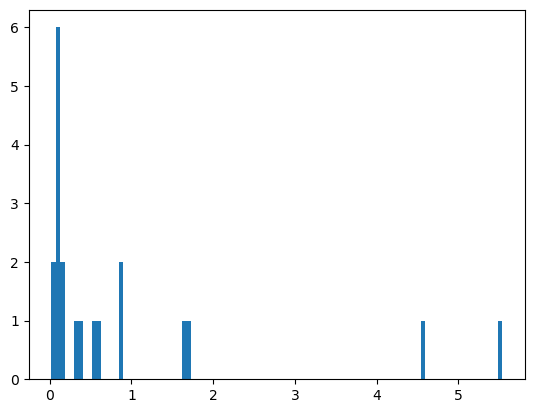

In [17]:
plt.hist(df_planet_population['ap'], bins=100)
plt.show()

In [ ]:
data_template = read_psg_template(file_name_psg_template)

for i in range(1): # len(df_planet_population)):

    data_template_this = data_template.copy(deep=True)

    data_template_this["<OBJECT-NAME"] = "Planet"
    data_template_this["<OBJECT-DIAMETER"] = str(int(6371) * 2 * df_planet_population['Rp'].values[i])  # (km); df_planet_population['Rp'] is (R_Earth = 6371 km)
    data_template_this["<OBJECT-GRAVITY>"] = str(int(5.972e+24) * df_planet_population['Mp'].values[i]) # mass of planet (if units are set to kg below) (kg); (M_Earth = 5.972e+24 kg)
    data_template_this["<OBJECT-GRAVITY-UNIT>"] = str("kg") # just total mass
    data_template_this["<OBJECT-STAR-DISTANCE>"] = str(df_planet_population['ap'].values[i]) # semimajor axis (AU)
    data_template_this["<OBJECT-SOLAR-LONGITUDE>"] = str(107.1) ## ## TODO: WHAT IS THIS?
    data_template_this["<OBJECT-SOLAR-LATITUDE>"] = str(25.10) ## ## TODO: WHAT IS THIS?

    data_template_this["<OBJECT-STAR-TYPE>"] = str("G")
    data_template_this["<OBJECT-STAR-TEMPERATURE>"] = str(5777)
    data_template_this["<OBJECT-STAR-RADIUS>"] = str(1.0)
    data_template_this["<OBJECT-OBS-LONGITUDE>"] = str(144.93)
    data_template_this["<OBJECT-OBS-LATITUDE>"] = str(16.36)
    data_template_this["<OBJECT-PERIOD>"] = str(1.02733456)
    data_template_this["<OBJECT-ORBIT>"] = str(0.09339400,49.55954,686.98000000,286.49683,1.38140,2458377.898109)
    data_template_this["<OBJECT-POSITION-ANGLE>"] = str(38.32)
    data_template_this["<OBJECT-INCLINATION>"] = str(0.00)

    data_template_this["GEOMETRY"] = "MAVEN" # TODO: standin for now; change to L2

    '''
    How to implement L2? Modify below later on #todo
    <GEOMETRY>Observatory
    <GEOMETRY-OFFSET-NS>0.0
    <GEOMETRY-OFFSET-EW>0.0
    <GEOMETRY-OFFSET-UNIT>diameter
    <GEOMETRY-OBS-ALTITUDE>1.4534
    <GEOMETRY-ALTITUDE-UNIT>AU
    <GEOMETRY-USER-PARAM>0.0
    <GEOMETRY-STELLAR-TYPE>G
    <GEOMETRY-STELLAR-TEMPERATURE>5777
    <GEOMETRY-STELLAR-MAGNITUDE>0
    <GEOMETRY-SOLAR-ANGLE>36.453
    <GEOMETRY-OBS-ANGLE>3.413
    <GEOMETRY-PLANET-FRACTION>6.045e-03
    <GEOMETRY-STAR-DISTANCE>-1.000000e+00
    <GEOMETRY-STAR-FRACTION>0.000000e+00
    <GEOMETRY-REF>User
    <GEOMETRY-DISK-ANGLES>1
    <GEOMETRY-ROTATION>-0.00,0.01
    <GEOMETRY-BRDFSCALER>1.000
    <GEOMETRY-AZIMUTH>0.000
    '''

write_psg_template("output.txt", data)